In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('iris.data.csv')
data.sample(5)

5.1  3.5  1.4  0.2      Iris-setosa
96   6.2  2.9  4.3  1.3  Iris-versicolor
139  6.7  3.1  5.6  2.4   Iris-virginica
117  7.7  2.6  6.9  2.3   Iris-virginica
38   5.1  3.4  1.5  0.2      Iris-setosa
76   6.7  3.0  5.0  1.7  Iris-versicolor

In [ ]:
X = data.iloc[:,0:4]
y = data.iloc[:,-1]
print(X.sample(5))
print(y.sample(5))

    5.1  3.5  1.4  0.2
31  5.2  4.1  1.5  0.1
22  5.1  3.3  1.7  0.5
76  6.7  3.0  5.0  1.7
47  5.3  3.7  1.5  0.2
63  5.6  2.9  3.6  1.3
46         Iris-setosa
21         Iris-setosa
139     Iris-virginica
119     Iris-virginica
94     Iris-versicolor
Name: Iris-setosa, dtype: object


In [ ]:
data["Iris-setosa"].value_counts()

Iris-setosa
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: count, dtype: int64

In [ ]:
import seaborn as sns
sns.set(style="white", color_codes=True)

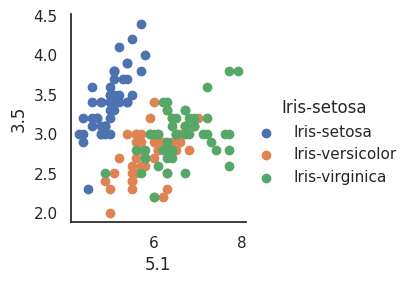

In [ ]:
sns.FacetGrid(data, hue="Iris-setosa") \
  .map(plt.scatter, "5.1", "3.5") \
  .add_legend();



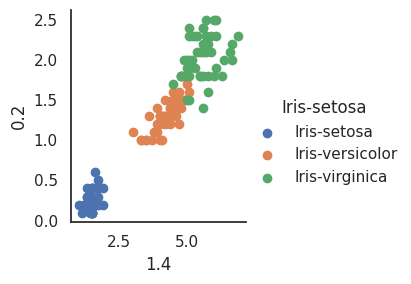

In [ ]:
sns.FacetGrid(data, hue="Iris-setosa") \
.map(plt.scatter, "1.4", "0.2") \
.add_legend();

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


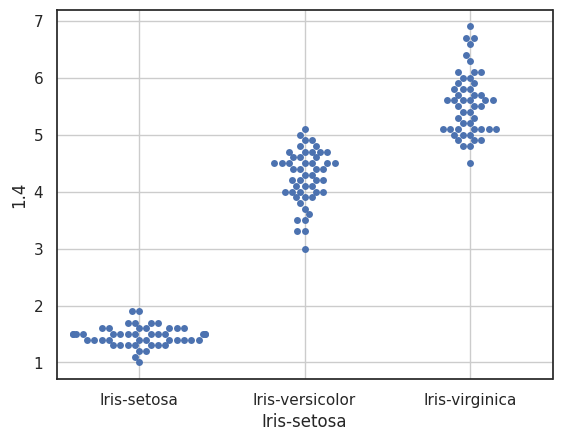

In [ ]:
sns.swarmplot(x="Iris-setosa", y="1.4", data=data)
plt.grid()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


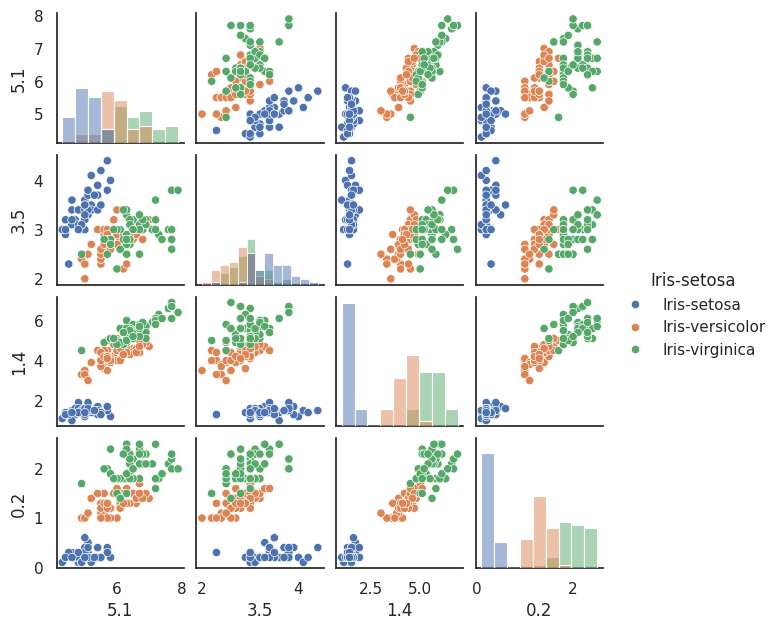

In [ ]:
sns.pairplot(data, hue="Iris-setosa", diag_kind="hist", size=1.6);

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
import seaborn as sns

# Load the Iris data
data = load_iris()

# Print a sample of the data
print(data.data[:5])  # Print the first 5 rows of the features
print(data.target[:5])  # Print the first 5 target labels

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [14]:
# Separate features and target variable
X = data.data  # Features
y = data.target  # Target labels

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
#PCA
from sklearn.decomposition import PCA
ndimensions = 2
pca = PCA(n_components=ndimensions, random_state=50)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2']) # PC=principal components
X_pca.sample(5)

PC1       PC2
71   0.476287 -0.417320
66   0.350252 -0.196312
113  1.260115 -1.162260
54   1.075475 -0.208421
115  1.590077  0.676245

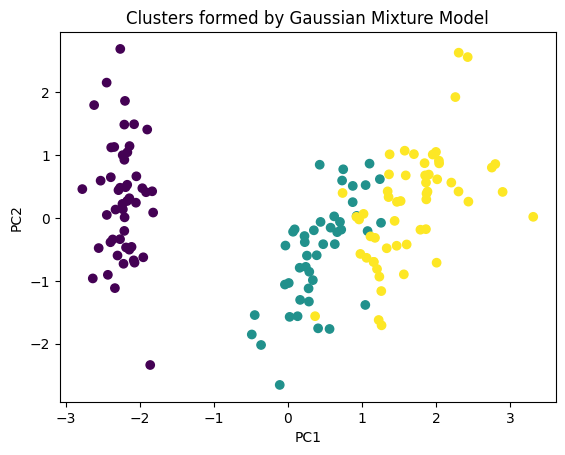

In [18]:
#Define the number of clusters (same as Iris species)
nclusters = 3

# GMM clustering
gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)

# Predict cluster labels for each data point
y_cluster_gmm = gmm.predict(X_scaled)

# Visualize clusters in PCA space
plt.scatter(X_pca['PC1'], X_pca['PC2'], c=y_cluster_gmm, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters formed by Gaussian Mixture Model')
plt.show()



In [17]:

print("Predicted cluster labels:", y_cluster_gmm)

Predicted cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
